In [1]:
import math
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed

Pearson correlation: 0.7558


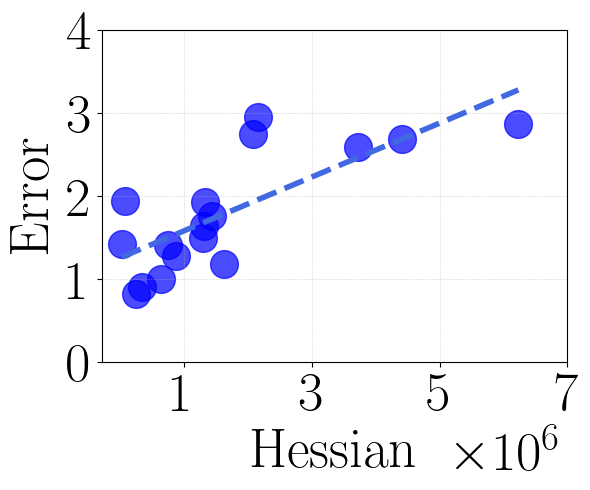

In [ ]:
import matplotlib.ticker as mticker

points = [(74480.58656089532, 1.9419488504956557), (213381.49665516967, 0.851746418943812), (253086.6286540146, 0.8163532751959408), (282410.6666216957, 0.8362747281997785), (336153.68669280515, 0.9007206735637695), (381378.84511459304, 0.9802386030497835), (640912.830085182, 1.0071708330607623), (753506.0387561438, 1.6228701554943474), (876176.908252524, 1.2818527872164318), (289076.1025470016, 2.024814872356662), (1290826.0210522383, 1.498235935508682), (1315073.0162269196, 1.6356580681229085), (1323849.343095776, 1.931531376144766), (1436833.2463154225, 1.763372146025765), (1625618.873458256, 1.1766562202230777), (2154816.180375141, 2.9473425993744495), (742236.5761052486, 1.4134358706053713), (2082053.155748539, 2.746937773238271), (3721652.9781241696, 2.5881948110592714), (6233269.719326181, 2.8625787652901344), (22291.966447618994, 1.4264450578393135), (4404385.244138549, 2.6811045420896242)]

train_hessian, datamodels_norm_error = zip(*points)
# Plot
coeffs = np.polyfit(train_hessian, datamodels_norm_error, 1)
fit_line = np.poly1d(coeffs)

x_vals = np.linspace(min(train_hessian), max(train_hessian), 500)
y_vals = fit_line(x_vals)
corr_matrix = np.corrcoef(train_hessian, datamodels_norm_error)
corr = corr_matrix[0, 1]
print(f"Pearson correlation: {corr:.4f}")
fig, ax = plt.subplots(figsize=(6, 5))

plt.scatter(train_hessian, datamodels_norm_error, color='blue', alpha=0.7, s=400)
plt.plot(x_vals, y_vals, color='royalblue', linewidth=4, ls='--', label=f"Fit: y = {coeffs[0]:.2e}x + {coeffs[1]:.2f}")

#plt.xscale('log')  # Hessians vary widely, log scale makes it clearer
plt.xlabel(r"$\mathrm{Hessian}$", fontsize=40)
plt.xticks([1e6, 3e6, 5e6, 7e6], fontsize=40)
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.xaxis.offsetText.set_fontsize(40)
plt.ylabel(r"$\mathrm{Error}$", fontsize=40)
plt.yticks([0, 1, 2, 3, 4], fontsize=40)
#plt.title("Connection between Train Hessian and Datamodels Normalized Error", fontsize=40)
plt.grid(lw=0.4, ls=":")
plt.tight_layout()

plt.savefig("hessian_datamodel.pdf", format="pdf", dpi=1200)
plt.show()
